In [1]:
cd /content/drive/MyDrive/BrandCar

/content/drive/MyDrive/BrandCar


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/BrandCar/Datasets/Train'
valid_path = '/content/drive/MyDrive/BrandCar/Datasets/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of ResNet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/BrandCar/Datasets/Train/*')

In [7]:
folders

['/content/drive/MyDrive/BrandCar/Datasets/Train/mercedes',
 '/content/drive/MyDrive/BrandCar/Datasets/Train/audi',
 '/content/drive/MyDrive/BrandCar/Datasets/Train/lamborghini']

In [8]:
  # useful for getting number of output classes
folders_test = glob('/content/drive/MyDrive/BrandCar/Datasets/Test/*')

In [9]:
folders_test

['/content/drive/MyDrive/BrandCar/Datasets/Test/mercedes',
 '/content/drive/MyDrive/BrandCar/Datasets/Test/audi',
 '/content/drive/MyDrive/BrandCar/Datasets/Test/lamborghini']

In [10]:
# our layers
x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
traning_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BrandCar/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 151 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BrandCar/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  traning_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(traning_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
4/5 [=======================>......] - ETA: 2s - loss: 6.9204 - accuracy: 0.3697

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5/5 [==============================] - 52s 8s/step - loss: 6.3700 - accuracy: 0.3775 - val_loss: 5.0343 - val_accuracy: 0.3750
Epoch 2/50
5/5 [==============================] - 7s 2s/step - loss: 4.1474 - accuracy: 0.3841 - val_loss: 5.6330 - val_accuracy: 0.2969
Epoch 3/50
5/5 [==============================] - 7s 2s/step - loss: 3.0608 - accuracy: 0.3245 - val_loss: 2.3614 - val_accuracy: 0.3125
Epoch 4/50
5/5 [==============================] - 7s 2s/step - loss: 2.0819 - accuracy: 0.4106 - val_loss: 2.7114 - val_accuracy: 0.3906
Epoch 5/50
5/5 [==============================] - 7s 1s/step - loss: 1.6558 - accuracy: 0.3907 - val_loss: 2.7158 - val_accuracy: 0.3906
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 1.3698 - accuracy: 0.4503 - val_loss: 2.0875 - val_accuracy: 0.2969
Epoch 7/50
5/5 [==============================] - 7s 2s/step - loss: 1.1121 - accuracy: 0.5695 - val_loss: 1.7661 - val_accuracy: 0.5000
Epoch 8/50
5/5 [==============================] - 7

In [18]:
r.history

{'accuracy': [0.37748345732688904,
  0.38410595059394836,
  0.3245033025741577,
  0.41059601306915283,
  0.3907284736633301,
  0.4503311216831207,
  0.5695364475250244,
  0.6291390657424927,
  0.6357616186141968,
  0.5894039869308472,
  0.6225165724754333,
  0.5894039869308472,
  0.5894039869308472,
  0.6092715263366699,
  0.5894039869308472,
  0.6754966974258423,
  0.6225165724754333,
  0.6158940196037292,
  0.6622516512870789,
  0.6688741445541382,
  0.6490066051483154,
  0.6291390657424927,
  0.7218543291091919,
  0.6490066051483154,
  0.6622516512870789,
  0.7748344540596008,
  0.807947039604187,
  0.807947039604187,
  0.8410596251487732,
  0.8410596251487732,
  0.8675496578216553,
  0.8211920261383057,
  0.8278145790100098,
  0.8278145790100098,
  0.807947039604187,
  0.7615894079208374,
  0.748344361782074,
  0.7152317762374878,
  0.8278145790100098,
  0.8211920261383057,
  0.8278145790100098,
  0.8807947039604187,
  0.8344370722770691,
  0.7549669146537781,
  0.7549669146537781,

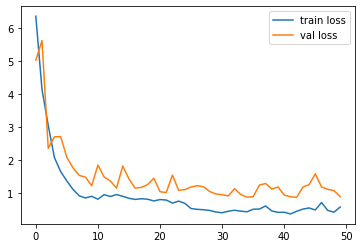

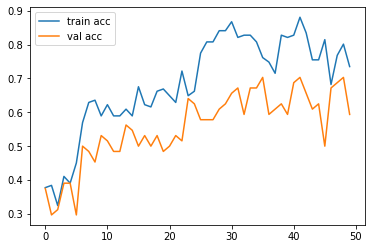

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [21]:
y_pred = model.predict(test_set)
y_pred_training = model.predict(traning_set)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [22]:
print(y_pred)

[[8.39210391e-01 6.86528074e-05 1.60721004e-01]
 [4.52015609e-01 1.37200961e-02 5.34264266e-01]
 [6.24059903e-05 1.08405292e-01 8.91532242e-01]
 [7.52770808e-04 9.98960376e-01 2.86879309e-04]
 [4.49789912e-01 1.87653210e-03 5.48333526e-01]
 [9.90718424e-01 1.20930560e-03 8.07227753e-03]
 [1.28615215e-01 8.50362778e-01 2.10219752e-02]
 [9.05863464e-01 3.81998834e-03 9.03166011e-02]
 [9.29925442e-01 3.63135487e-02 3.37610170e-02]
 [2.07841881e-02 7.93531246e-04 9.78422284e-01]
 [9.43502188e-01 1.05728665e-02 4.59249318e-02]
 [9.26110387e-01 4.03207727e-02 3.35689038e-02]
 [1.11574056e-02 9.87370133e-01 1.47252111e-03]
 [4.11280811e-01 2.54734000e-03 5.86171865e-01]
 [2.67261267e-01 1.41448388e-02 7.18593895e-01]
 [3.69402161e-03 9.92907405e-01 3.39858071e-03]
 [8.38626325e-02 1.16581167e-03 9.14971530e-01]
 [3.80837321e-02 5.91392862e-04 9.61324811e-01]
 [3.53964120e-01 6.42280877e-01 3.75505281e-03]
 [8.43316734e-01 6.92319423e-02 8.74513760e-02]
 [7.86290526e-01 2.09855065e-02 1.927239

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred_training = np.argmax(y_pred_training,axis = 1)

In [37]:
from collections import Counter
print("y_pred \n",y_pred)
item_count_test = Counter(y_pred)
print("\n",item_count_test)
print("\n y_pred_training \n",y_pred_training)
item_count_train = Counter(y_pred_training)
print("\n",item_count_train)

y_pred 
 [0 2 2 1 2 0 1 0 0 2 0 0 1 2 2 1 2 2 1 0 0 2 2 1 1 1 0 2 1 0 1 2 1 2 1 0 1
 0 1 0 2 2 2 2 0 2 2 2 2 2 2 0 0 0 0 2 0 0 1 2 1 2 2 0]

 Counter({2: 27, 0: 21, 1: 16})

 y_pred_training 
 [0 2 1 2 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 2 0 0 1 1 2 1 0 0 1 0 2 0
 2 0 2 1 1 1 0 1 2 0 0 2 0 0 1 1 0 1 2 0 2 0 2 0 1 0 0 2 0 0 0 2 1 0 2 1 0
 2 0 0 2 2 0 2 0 0 0 2 2 1 0 0 0 0 1 0 2 2 1 0 0 1 0 2 0 1 0 0 0 0 1 0 2 0
 0 0 0 0 1 2 2 2 2 2 2 0 0 0 0 2 0 1 1 0 0 0 0 1 0 2 0 1 2 2 0 1 0 2 0 1 0
 2 0 1]

 Counter({0: 79, 2: 37, 1: 35})


In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('model_resnet50.h5')

In [41]:
img=image.load_img('/content/drive/MyDrive/BrandCar/Datasets/Test/audi/14.jpg',target_size=(224,224))

In [42]:
x=image.img_to_array(img)
x

array([[[217., 219., 234.],
        [217., 219., 234.],
        [217., 219., 234.],
        ...,
        [220., 222., 237.],
        [220., 222., 237.],
        [220., 222., 237.]],

       [[217., 219., 234.],
        [217., 219., 234.],
        [217., 219., 234.],
        ...,
        [214., 216., 231.],
        [214., 216., 231.],
        [214., 216., 231.]],

       [[216., 218., 233.],
        [216., 218., 233.],
        [216., 218., 233.],
        ...,
        [213., 215., 230.],
        [213., 215., 230.],
        [213., 215., 230.]],

       ...,

       [[169., 172., 177.],
        [173., 176., 181.],
        [175., 178., 183.],
        ...,
        [172., 175., 180.],
        [172., 175., 180.],
        [172., 175., 180.]],

       [[178., 179., 181.],
        [178., 179., 181.],
        [178., 179., 181.],
        ...,
        [194., 195., 197.],
        [194., 195., 197.],
        [194., 195., 197.]],

       [[ 45.,  46.,  48.],
        [ 45.,  46.,  48.],
        [ 45.,  

In [43]:
x.shape

(224, 224, 3)

In [44]:
x=x/255

In [45]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [46]:
model.predict(img_data)

array([[1.30135125e-10, 9.84849095e-01, 1.51508935e-02]], dtype=float32)

In [47]:
a=np.argmax(model.predict(img_data), axis=1)

In [48]:
a

array([1])

In [49]:
folders_test

['/content/drive/MyDrive/BrandCar/Datasets/Test/mercedes',
 '/content/drive/MyDrive/BrandCar/Datasets/Test/audi',
 '/content/drive/MyDrive/BrandCar/Datasets/Test/lamborghini']